In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [41]:
# no of files in train folder
train_files = os.listdir('train')
print('No of files in train folder:', len(train_files))

No of files in train folder: 50000


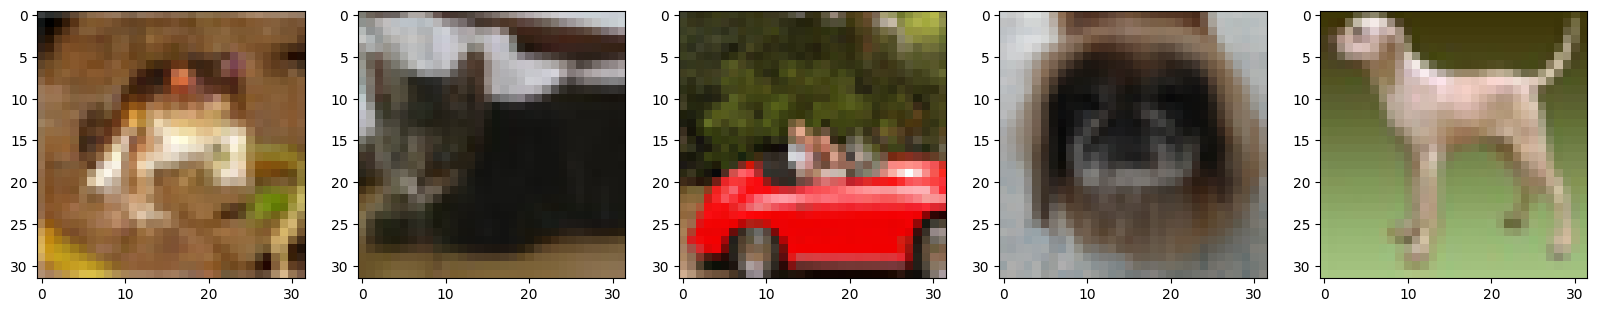

In [7]:
# display the first 5 images
fig = plt.figure(figsize=(20, 10))
for i in range(5):
    img = mpimg.imread('train/' + train_files[i])
    ax = fig.add_subplot(1, 5, i+1)
    ax.imshow(img)
plt.show() 

In [8]:
# shape of the images
img = Image.open('train/' + train_files[0])
print('Shape of the images:', np.array(img).shape)

Shape of the images: (32, 32, 3)


In [2]:
# Labels
labels = pd.read_csv('trainLabels.csv')
labels.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [3]:
labels.tail()   

,id,label
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [4]:
# value counts of the labels
labels['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [5]:
# unique labels
unique_labels = labels['label'].unique()
# sort the labels
unique_labels.sort()
print('Unique labels:', unique_labels)

Unique labels: ['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck']


In [13]:
# replace the unique labels with numbers 0 to 9
labels['label'] = labels['label'].replace(unique_labels, range(10))

C:\Users\Gokuleshwaran\AppData\Local\Temp\ipykernel_11840\1543186510.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  labels['label'] = labels['label'].replace(unique_labels, range(10))


In [15]:
labels[labels['id'] == 45888]

,id,label
45887,45888,5


In [14]:
print(labels.head())

   id  label
0   1      6
1   2      9
2   3      9
3   4      4
4   5      1


In [15]:
print(labels.tail())

          id  label
49995  49996      2
49996  49997      6
49997  49998      9
49998  49999      1
49999  50000      1


In [16]:
# convert the images to numpy array
X = []
path = 'train/'
train_files = os.listdir(path)
for i in train_files:
    img = Image.open(path + i)
    # img = img.resize((64, 64))
    img = np.array(img)
    X.append(img)

In [17]:
type(X)

list

In [18]:
len(X)

50000

In [19]:
type(X[0])

numpy.ndarray

In [20]:
X[0].shape

(32, 32, 3)

In [21]:
X[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [24]:
# convert the list to numpy array
X = np.array(X)

In [25]:
# shape of the numpy array
print('Shape of the numpy array:', X.shape)
print('Data type:', X.dtype)
print('Shape of the first image:', X[0].shape)
print('Shape of the Y shape:', labels.shape)

Shape of the numpy array: (50000, 32, 32, 3)
Data type: uint8
Shape of the first image: (32, 32, 3)
Shape of the Y shape: (50000, 2)


In [29]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, labels['label'], test_size=0.2, random_state=2)

In [30]:
X_train

array([[[[242, 242, 242],
         [239, 239, 239],
         [239, 239, 239],
         ...,
         [234, 238, 237],
         [235, 238, 237],
         [239, 239, 239]],

        [[238, 238, 238],
         [235, 235, 233],
         [234, 234, 234],
         ...,
         [231, 237, 236],
         [232, 237, 236],
         [236, 237, 237]],

        [[217, 217, 217],
         [212, 212, 211],
         [214, 213, 216],
         ...,
         [230, 240, 241],
         [236, 239, 241],
         [239, 239, 239]],

        ...,

        [[124, 130, 105],
         [124, 128, 105],
         [121, 125, 102],
         ...,
         [ 73,  85,  65],
         [ 71,  78,  64],
         [ 98, 100,  84]],

        [[110, 121,  95],
         [114, 120,  97],
         [115, 120,  97],
         ...,
         [ 89, 111,  78],
         [102, 115,  85],
         [112, 120,  91]],

        [[113, 124,  94],
         [116, 122,  97],
         [119, 123, 100],
         ...,
         [103, 122,  91],
        

In [27]:
# Scaling the data
X_train = X_train / 255
X_test = X_test / 255

In [28]:
X_train

array([[[[0.94901961, 0.94901961, 0.94901961],
         [0.9372549 , 0.9372549 , 0.9372549 ],
         [0.9372549 , 0.9372549 , 0.9372549 ],
         ...,
         [0.91764706, 0.93333333, 0.92941176],
         [0.92156863, 0.93333333, 0.92941176],
         [0.9372549 , 0.9372549 , 0.9372549 ]],

        [[0.93333333, 0.93333333, 0.93333333],
         [0.92156863, 0.92156863, 0.91372549],
         [0.91764706, 0.91764706, 0.91764706],
         ...,
         [0.90588235, 0.92941176, 0.9254902 ],
         [0.90980392, 0.92941176, 0.9254902 ],
         [0.9254902 , 0.92941176, 0.92941176]],

        [[0.85098039, 0.85098039, 0.85098039],
         [0.83137255, 0.83137255, 0.82745098],
         [0.83921569, 0.83529412, 0.84705882],
         ...,
         [0.90196078, 0.94117647, 0.94509804],
         [0.9254902 , 0.9372549 , 0.94509804],
         [0.9372549 , 0.9372549 , 0.9372549 ]],

        ...,

        [[0.48627451, 0.50980392, 0.41176471],
         [0.48627451, 0.50196078, 0.41176471]

In [31]:
# Save the data
np.save('X_train', X_train)
np.save('X_test', X_test)
np.save('y_train', y_train)
np.save('y_test', y_test)

In [32]:
# Print the shape of the data
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (40000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: (40000,)
y_test shape: (10000,)


In [33]:
# Load X_train, X_test, y_train, y_test
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

In [34]:
# Print the shape of the data
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (40000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: (40000,)
y_test shape: (10000,)


In [5]:
X_train

array([[[[0.2627451 , 0.23921569, 0.27058824],
         [0.28627451, 0.25098039, 0.26666667],
         [0.30980392, 0.2745098 , 0.27843137],
         ...,
         [0.12156863, 0.25098039, 0.37254902],
         [0.12156863, 0.24313725, 0.35686275],
         [0.10980392, 0.23921569, 0.35686275]],

        [[0.20784314, 0.18823529, 0.23921569],
         [0.24705882, 0.21176471, 0.23921569],
         [0.27843137, 0.23529412, 0.24705882],
         ...,
         [0.10588235, 0.25098039, 0.38823529],
         [0.10588235, 0.24705882, 0.37647059],
         [0.10196078, 0.24313725, 0.37647059]],

        [[0.14117647, 0.14901961, 0.18431373],
         [0.21176471, 0.19215686, 0.20392157],
         [0.2627451 , 0.23137255, 0.21960784],
         ...,
         [0.10588235, 0.25882353, 0.40392157],
         [0.10588235, 0.25490196, 0.4       ],
         [0.10588235, 0.25098039, 0.39607843]],

        ...,

        [[0.6       , 0.5254902 , 0.4627451 ],
         [0.60784314, 0.53333333, 0.47058824]

In [35]:
# Building the model
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [37]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
convolutional_base.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
num_classes = 10
model = models.Sequential()
# upscale from 32x32 to 256x256
# therefore input_shape is 32x32
model.add(layers.UpSampling2D(size=(2, 2))) # 64x64
model.add(layers.UpSampling2D(size=(2, 2))) # 128x128
model.add(layers.UpSampling2D(size=(2, 2))) # 256x256
# add the convolutional base
model.add(convolutional_base) 
# add new layers
model.add(layers.Flatten()) # Matrix to vector
model.add(layers.BatchNormalization()) # Normalize the activations of the previous layer at each batch
model.add(layers.Dense(128, activation='relu')) # Fully connected layer
model.add(layers.Dropout(0.5)) # Dropout layer
model.add(layers.BatchNormalization()) # Normalize the activations of the previous layer at each batch
model.add(layers.Dense(64, activation='relu')) # Fully connected layer
model.add(layers.Dropout(0.5)) # Dropout layer
model.add(layers.BatchNormalization()) # Normalize the activations of the previous layer at each batch
model.add(layers.Dense(num_classes, activation='softmax')) # Fully connected layer
# we add Dropout layers to avoid overfitting
# We add BatchNormalization layers to speed up the training process
# We add Dense layers to make the final prediction
# We use the softmax activation function for the output layer because we have 10 classes
# We use the ReLU activation function for the hidden layers
# We use the He normal initializer for the kernel_initializer
# We use the Adam optimizer
# We use the sparse_categorical_crossentropy loss function because we have integer labels
# We use the accuracy metric to see the accuracy of the model
# We should add Flatten layer before the Dense layers to convert the matrix to vector
# We should add Flatten layer after the convolutional base to convert the matrix to vector

In [39]:
# compile the model
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
# train the model
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10)

In [ ]:
# loss and accuracy
loss, accuracy = model.evaluate(X_test, y_test)

In [ ]:
# plot the loss and accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Save weights
model.save_weights('model_weights.h5')